In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('winequality_red.csv')
print(df.head(),'\n\n\n')
print(df.shape,'\n\n\n')
print(df.var())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
X = df[['fixed acidity','volatile acidity'  ,'citric acid' , 'residual sugar' , 'chlorides' ,'free sulfur dioxide', 'total sulfur dioxide' , 'density', 'pH', 'sulphates','alcohol'  ]]
y = df['quality']

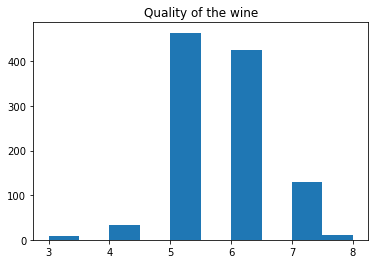

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

plt.hist(y_train)
plt.title("Quality of the wine")
plt.show()

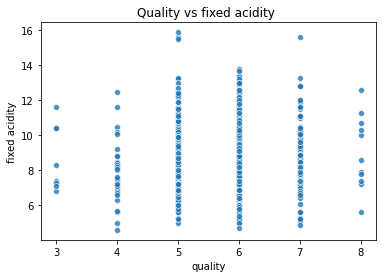

In [5]:
sns.scatterplot(y_train, X_train['fixed acidity'] ,alpha = 0.8)
plt.title("Quality vs fixed acidity ")
plt.show()

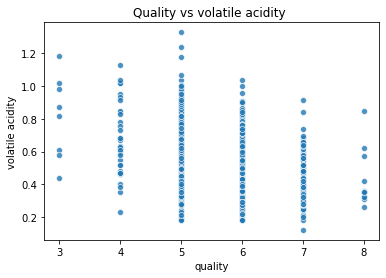

In [6]:
sns.scatterplot(y_train, X_train['volatile acidity'] ,alpha = 0.8)
plt.title("Quality vs volatile acidity ")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))

0.3594443107265092


In [8]:
from sklearn import preprocessing
df["new free sulfur dioxide"] = np.array(df["free sulfur dioxide"])
n1 = df["free sulfur dioxide"]
n1_scaled = preprocessing.scale(n1)
n1_scaled.mean(axis =0 )
n1_scaled.std(axis =0 )
df["new free sulfur dioxide"] = n1_scaled

df["new total sulfur dioxide"] = np.array(df["total sulfur dioxide"])
n2 = df["total sulfur dioxide"]
n2_scaled = preprocessing.scale(n2)
n2_scaled.mean(axis =0 )
n2_scaled.std(axis =0 )
df["new total sulfur dioxide"] = n2_scaled

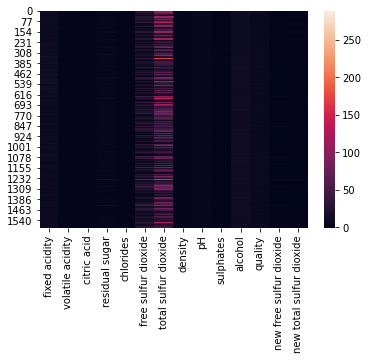

In [9]:
heat_map = sns.heatmap(df)
plt.show()

In [10]:
correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'quality').index
print(columns.shape)
columns = ['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity','residual sugar', 'new free sulfur dioxide', 'pH', 'chlorides']

(10,)


In [11]:
X = df
Y = X['quality'].values
X = X.drop('quality', axis = 1).values
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.1, random_state=42)

reg1 = LinearRegression()
reg1.fit(X_train,Y_train)
y_pred = reg1.predict(X_test)
print(reg1.score(X_test, Y_test))


0.424884089170941


In [12]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
scaler = StandardScaler().fit(X_test)
rescaled_X_test = scaler.transform(X_test)
model = GradientBoostingRegressor(random_state=21, n_estimators=100)
model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

NameError: name 'StandardScaler' is not defined

In [ ]:
print(model.score(rescaled_X_test ,Y_test))

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test , predictions)

In [ ]:
df['quality'].unique()